<a href="https://colab.research.google.com/github/AyushShinde88/MLnow_2.0/blob/main/Univariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created to perfrom univariate regression on dataset.

`Univariate Regression`


**Date Created**: June 13, 2021

**Author**:
 Ayush Shinde
 

**Reach out**:
 | [GitHub](https://github.com/AyushShinde88) |

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
ls


StudentsPerformance.csv  univariate_Data_2.csv


In [76]:
cd /content/drive/MyDrive/ML.now()/LiveCodeSessions/Univariate Linear Regression/Students2.0

/content/drive/MyDrive/ML.now()/LiveCodeSessions/Univariate Linear Regression/Students2.0


In [77]:
ls


StudentsPerformance.csv  univariate_Data_2.csv


In [78]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [79]:
Data = pd.read_csv('StudentsPerformance.csv') #load the csv file as dataframe


In [80]:
Data.head() #print the first five rows of the dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
Data.info # print all infor related to data

<bound method DataFrame.info of      gender race/ethnicity  ... reading score writing score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 8 columns]>

In [83]:
Data['test preparation course'] = Data['test preparation course'].apply({'completed':1, 'none':2}.get) 

In [84]:
uniData = Data[['reading score', 'test preparation course']]
uniData.tail(5)

,reading score,test preparation course
995,99,1
996,55,2
997,71,1
998,78,1
999,86,2


In [85]:
uniData.to_csv('univariate_Data_2.csv')


In [86]:
ls

StudentsPerformance.csv  univariate_Data_2.csv


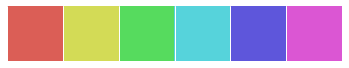

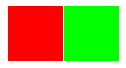

In [87]:

import seaborn as sns
sns.palplot(sns.color_palette("hls")) 
pal = sns.color_palette('hls', 8) #print 6 color shades from flare
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#ff0000', '#00ff00'] #blue and pink hex codes 
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [88]:
uniData.columns #columns in the dataframe


Index(['reading score', 'test preparation course'], dtype='object')

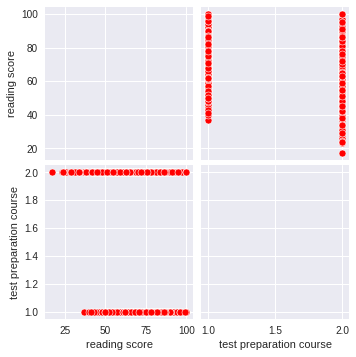

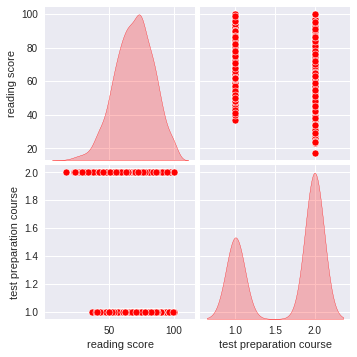

In [89]:
sns.pairplot(uniData,
             x_vars = ['reading score', 'test preparation course'],
             y_vars =  ['reading score', 'test preparation course'],
       diag_kind='none'
             )

sns.pairplot(uniData,
             x_vars = ['reading score', 'test preparation course'],
             y_vars =  ['reading score', 'test preparation course'],
       diag_kind='kde'
             )

# Data Split


In [90]:
#80-20 train-test percent split

trainDataset = uniData.sample(frac=0.89, random_state=0) 
testDataset = uniData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     reading score  test preparation course
993             72                        2
859             73                        2
298             46                        1
553             62                        2
672             78                        2
    reading score  test preparation course
9              60                        2
28             70                        2
42             58                        2
47             71                        2
53             78                        2


In [91]:
print(trainDataset.shape)
print(testDataset.shape)

(890, 2)
(110, 2)


In [92]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     reading score  test preparation course
993             72                        2
859             73                        2
298             46                        1
553             62                        2
672             78                        2
    reading score  test preparation course
9              60                        2
28             70                        2
42             58                        2
47             71                        2
53             78                        2


In [93]:

#removing the reading score column and saving it into the labels variable

trainLabels = trainFeatures.pop('reading score')
testLabels = testFeatures.pop('reading score')

print(trainLabels.head())
print(testLabels.head())

993    72
859    73
298    46
553    62
672    78
Name: reading score, dtype: int64
9     60
28    70
42    58
47    71
53    78
Name: reading score, dtype: int64


In [94]:
print(trainFeatures.head())
print(testFeatures.head())

     test preparation course
993                        2
859                        2
298                        1
553                        2
672                        2
    test preparation course
9                         2
28                        2
42                        2
47                        2
53                        2


In [95]:
# univariate -> num(features) = 1


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [96]:

model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [97]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
28/28 [==============================] - 1s 6ms/step - loss: 70.0726 - mae: 70.0726 - mse: 5121.7866 - val_loss: 68.0306 - val_mae: 68.0306 - val_mse: 4835.3877
Epoch 2/300
28/28 [==============================] - 0s 2ms/step - loss: 69.9989 - mae: 69.9989 - mse: 5111.5874 - val_loss: 67.9547 - val_mae: 67.9547 - val_mse: 4825.1113
Epoch 3/300
28/28 [==============================] - 0s 2ms/step - loss: 69.9254 - mae: 69.9254 - mse: 5101.4287 - val_loss: 67.8785 - val_mae: 67.8785 - val_mse: 4814.8076
Epoch 4/300
28/28 [==============================] - 0s 1ms/step - loss: 69.8517 - mae: 69.8517 - mse: 5091.1865 - val_loss: 67.8025 - val_mae: 67.8025 - val_mse: 4804.5566
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 69.7781 - mae: 69.7781 - mse: 5081.0176 - val_loss: 67.7264 - val_mae: 67.7264 - val_mse: 4794.2959
Epoch 6/300
28/28 [==============================] - 0s 2ms/step - loss: 69.7044 - mae: 69.7044 - mse: 5070.8022 - val_loss: 67.6505 - 

In [98]:
print(history)


In [99]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


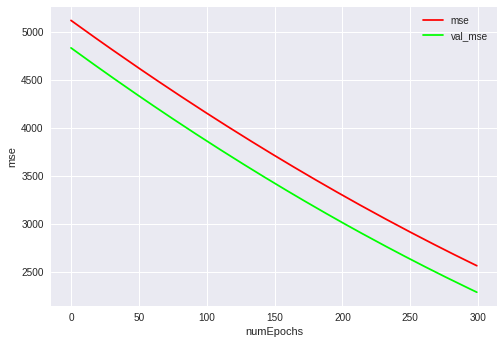

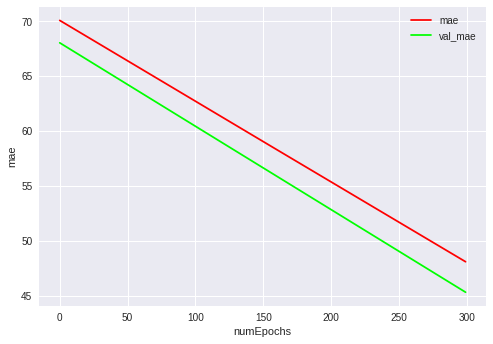

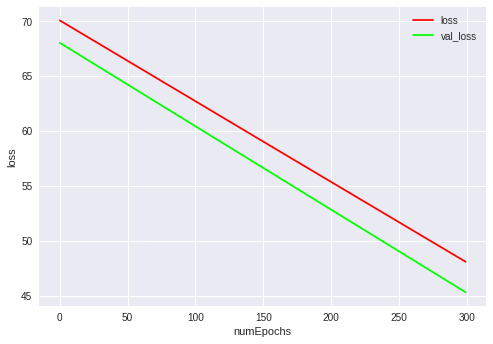

In [103]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('numEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [101]:
model.predict([1])

array([[16.343533]], dtype=float32)

In [104]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[16.343533]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[16.343533]
 [24.29061 ]
 [32.237686]
 [40.184765]
 [48.131844]]

List of Predictions (flattened out):
[16.343533 24.29061  32.237686 40.184765 48.131844]



In [105]:
print(testFeatures)

     test preparation course
9                          2
28                         2
42                         2
47                         2
53                         2
..                       ...
936                        2
947                        2
949                        1
966                        1
983                        1

[110 rows x 1 columns]


In [106]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [107]:
print(len(testPreds))
print(testPreds)

110
[24.29061  24.29061  24.29061  24.29061  24.29061  24.29061  16.343533
 24.29061  16.343533 24.29061  24.29061  24.29061  24.29061  24.29061
 24.29061  24.29061  16.343533 24.29061  24.29061  24.29061  16.343533
 16.343533 16.343533 24.29061  24.29061  24.29061  24.29061  24.29061
 16.343533 24.29061  24.29061  16.343533 24.29061  24.29061  16.343533
 24.29061  24.29061  24.29061  24.29061  16.343533 24.29061  24.29061
 24.29061  16.343533 24.29061  24.29061  24.29061  24.29061  16.343533
 16.343533 24.29061  16.343533 24.29061  24.29061  24.29061  24.29061
 24.29061  16.343533 24.29061  24.29061  24.29061  24.29061  24.29061
 24.29061  16.343533 24.29061  24.29061  24.29061  24.29061  16.343533
 16.343533 16.343533 24.29061  24.29061  24.29061  16.343533 16.343533
 16.343533 24.29061  24.29061  24.29061  24.29061  24.29061  24.29061
 24.29061  16.343533 24.29061  24.29061  24.29061  24.29061  16.343533
 24.29061  16.343533 24.29061  24.29061  24.29061  16.343533 24.29061
 24.29061

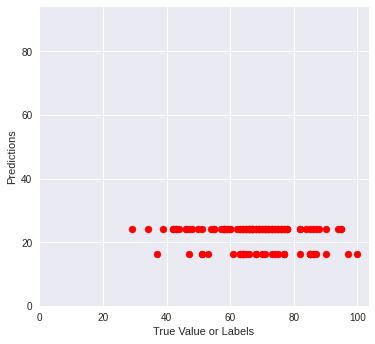

In [108]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

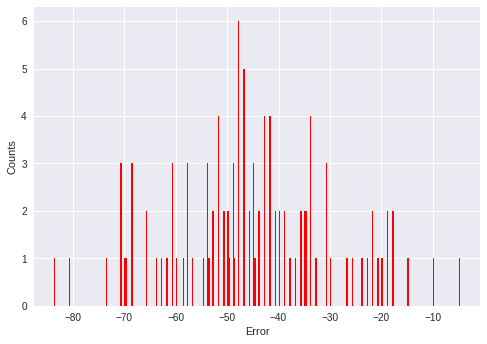

In [109]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)